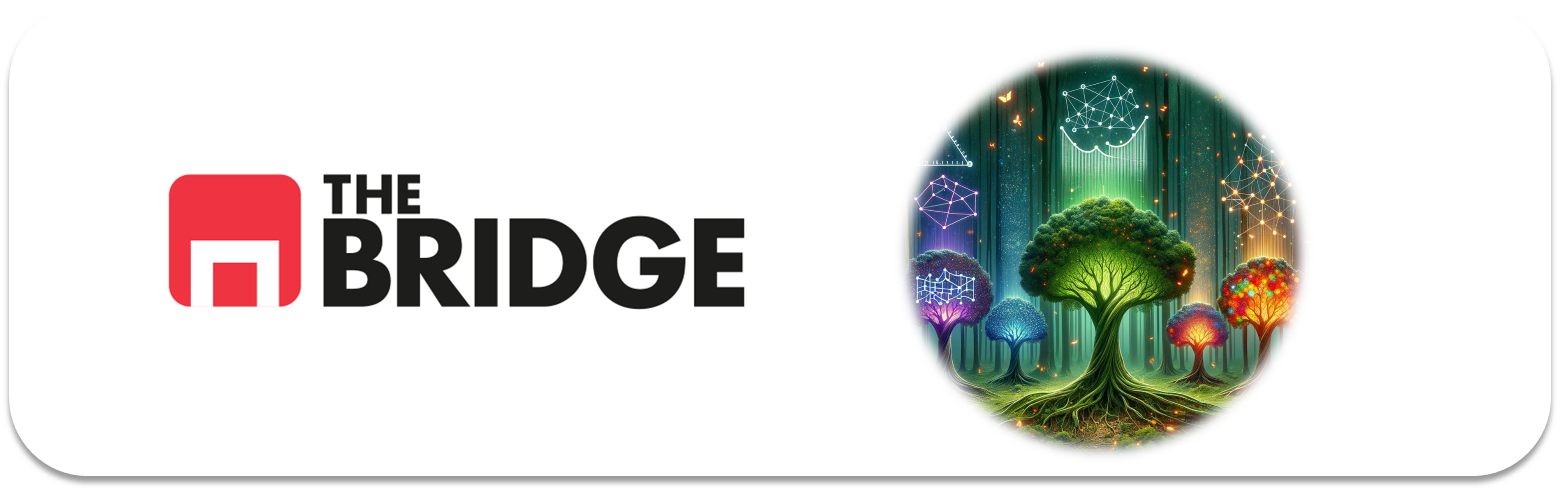

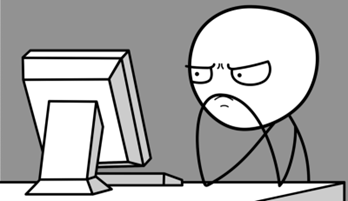

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score,precision_score, mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRINT_13\UNIT_1\EJERCICIOS\data\temps.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
def funcion_categorias(df):
    
    """
    Obtiene información sobre el tipo de categoria de cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
   
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [5]:
funcion_categorias(df)

,Categoria
year,numerica discreta
month,numerica continua
day,numerica continua
week,categorica ordinal
temp_2,numerica continua
temp_1,numerica continua
average,numerica continua
actual,numerica continua
forecast_noaa,numerica continua
forecast_acc,numerica continua


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [6]:
df_encode= pd.get_dummies(df, dtype= int, columns=["week", "year"])

In [7]:
df_encode

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,year_2016
0,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0,1
1,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0,1
2,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0,1
3,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0,1
4,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0,1
344,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1,1
345,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0,1
346,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0,1


### Ejercicio 3

Divide en train y test

In [8]:
df_encode.columns

Index(['month', 'day', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed', 'year_2016'],
      dtype='object')

In [9]:
X= df_encode[['month', 'day', 'temp_2', 'temp_1', 'actual','forecast_noaa', 
              'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed', 'year_2016']]

y = df_encode.average

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train_X shape después de la división:", X_train.shape)
print("train_y shape después de la división:", y_train.shape)

train_X shape después de la división: (278, 17)
train_y shape después de la división: (278,)


### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [30]:
tre_reg= DecisionTreeRegressor()

tre_reg = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=2, splitter= 'best', random_state=42)
tre_reg.fit(X, y)



DecisionTreeRegressor(min_samples_leaf=2, random_state=42)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [31]:
tre_reg.fit(X_train, y_train)
y_pred=tre_reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.820238095238095


In [32]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [33]:
mae(y_test, y_pred)

0.820238095238095

### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [34]:
mean_absolute_percentage_error(y_test, y_pred)*100

1.448233693272256

In [35]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [36]:
mape(y_test, y_pred)

1.448233693272256

### Ejercicio 7

Representa el árbol de decision

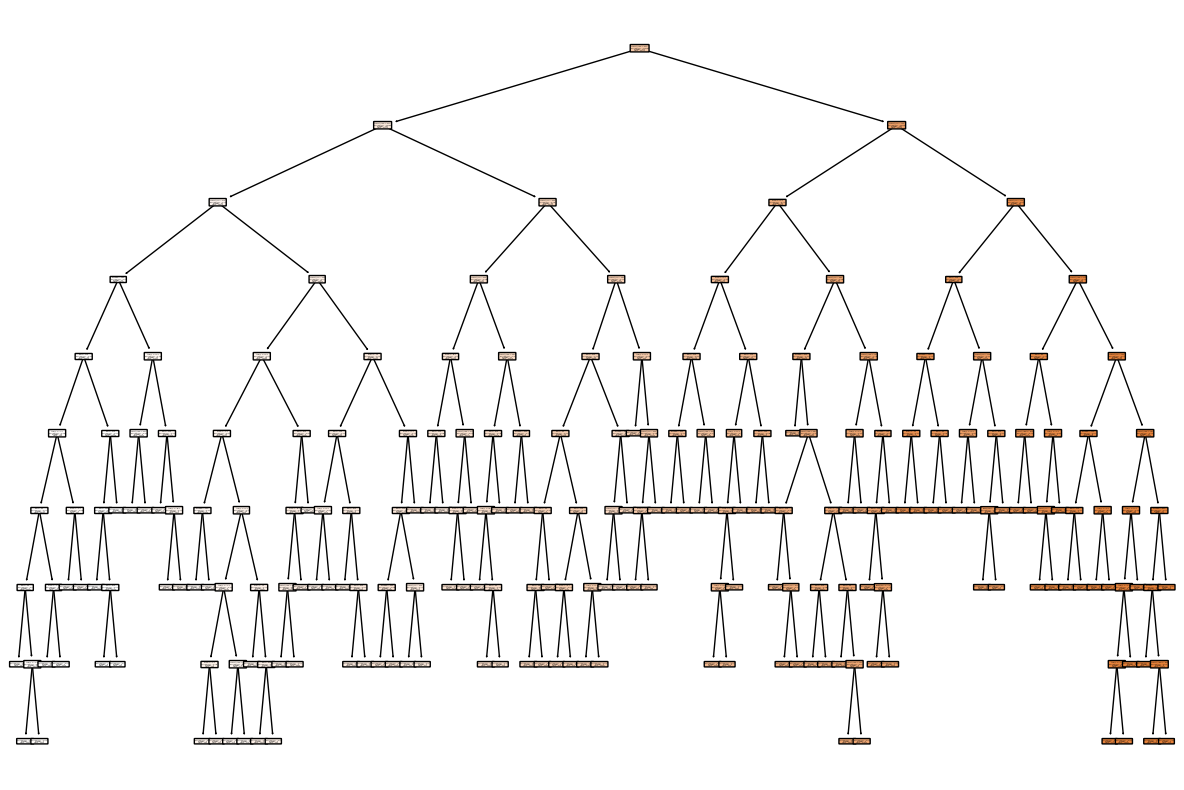

In [51]:
plt.figure(figsize=(15, 10))
plot_tree(tre_reg, filled=True, feature_names=df_encode.columns, rounded=True )
plt.show()

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [37]:
tree_reg= DecisionTreeRegressor()

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=2, splitter= 'best', random_state=42)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=42)

In [38]:
tree_reg.fit(X_train, y_train)
y_pred=tree_reg.predict(X_test)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [39]:
mae(y_test, y_pred)


1.3972431864431891

In [40]:
mape(y_test, y_pred)

2.4308409913449127

### Ejercicio 10

Vuelve a representar su árbol

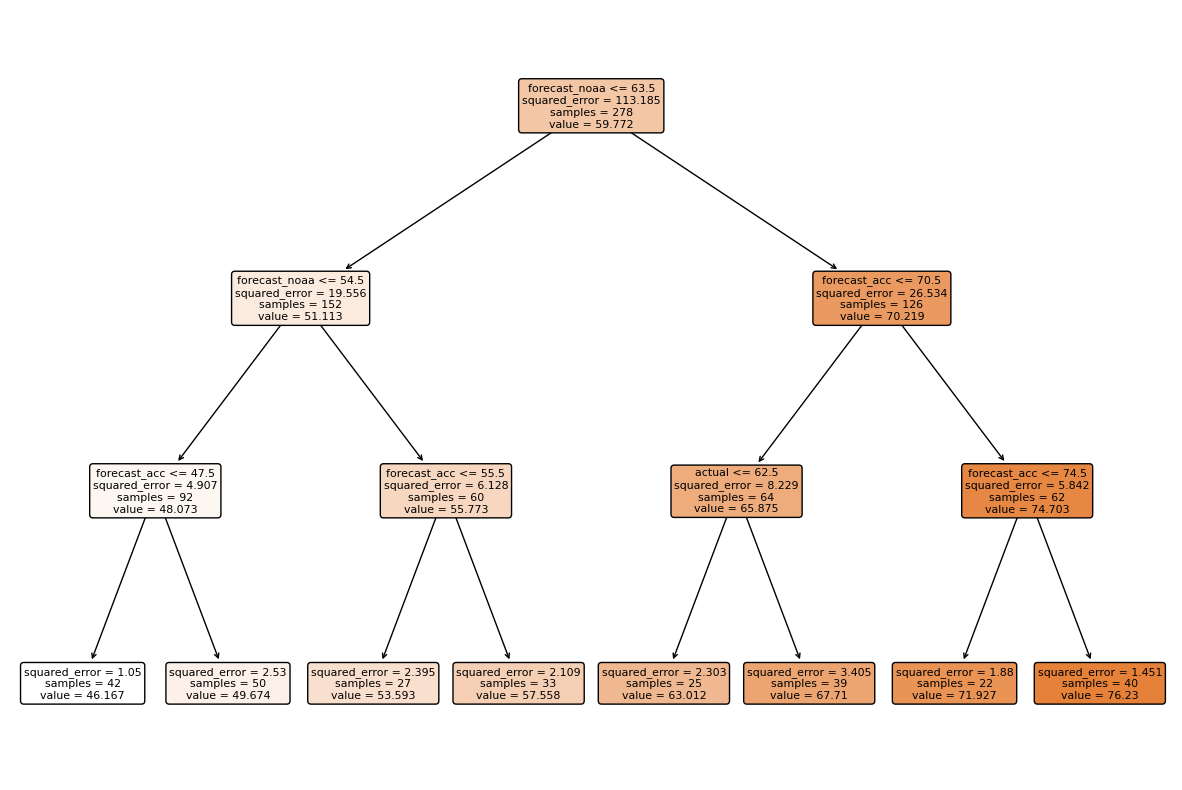

In [52]:
plt.figure(figsize=(15, 10))
plot_tree(tree_reg, filled=True, feature_names=df_encode.columns, rounded=True)
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [41]:
tre_reg.feature_importances_

array([7.86521214e-04, 3.58843410e-03, 5.30849648e-04, 8.45800167e-04,
       1.62274595e-03, 1.23943016e-02, 8.70175014e-01, 1.09967692e-01,
       4.00148674e-06, 4.63415322e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.95993351e-05, 1.86983381e-05,
       0.00000000e+00])

In [42]:
pd.DataFrame({'features':X.columns,
              'importance':tre_reg.feature_importances_}).sort_values('importance',
                                                                  ascending=False)

,features,importance
6,forecast_acc,0.870175
7,forecast_under,0.109968
5,forecast_noaa,0.012394
1,day,0.003588
4,actual,0.001623
3,temp_1,0.000846
0,month,0.000787
2,temp_2,0.000531
9,week_Fri,0.000046
14,week_Tues,0.000020


In [43]:
tree_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01089303, 0.8844312 , 0.10467578, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [44]:
pd.DataFrame({'features':X.columns,
              'importance':tree_reg.feature_importances_}).sort_values('importance',
                                                                  ascending=False)

,features,importance
6,forecast_acc,0.884431
7,forecast_under,0.104676
5,forecast_noaa,0.010893
0,month,0.000000
10,week_Mon,0.000000
15,week_Wed,0.000000
14,week_Tues,0.000000
13,week_Thurs,0.000000
12,week_Sun,0.000000
11,week_Sat,0.000000
